Saving jogadores.csv to jogadores.csv
Index(['id', 'score', 'nivel', 'categoria', 'idade', 'pais'], dtype='object')
   id     score  nivel  categoria  idade           pais
0   1  321057.0  321.0       elfo   43.0  United States
1   2  495527.0  466.0       mago   16.0         Canada
2   3  700848.0  255.0        NaN   54.0  United States
3   4  985558.0  679.0       mago   87.0         Brazil
4   5  517633.0  752.0  guerreiro   69.0          Japan
id           0
score        2
nivel        2
categoria    3
idade        3
pais         2
dtype: int64
                id          score        nivel       idade
count  1000.000000     998.000000   998.000000  997.000000
mean    500.500000  496350.856713   495.098196   56.822467
std     288.819436  283458.860428   288.395089   25.249907
min       1.000000    -464.000000  -516.000000   12.000000
25%     250.750000  259577.250000   247.750000   35.000000
50%     500.500000  497023.500000   493.500000   59.000000
75%     750.250000  745172.50000

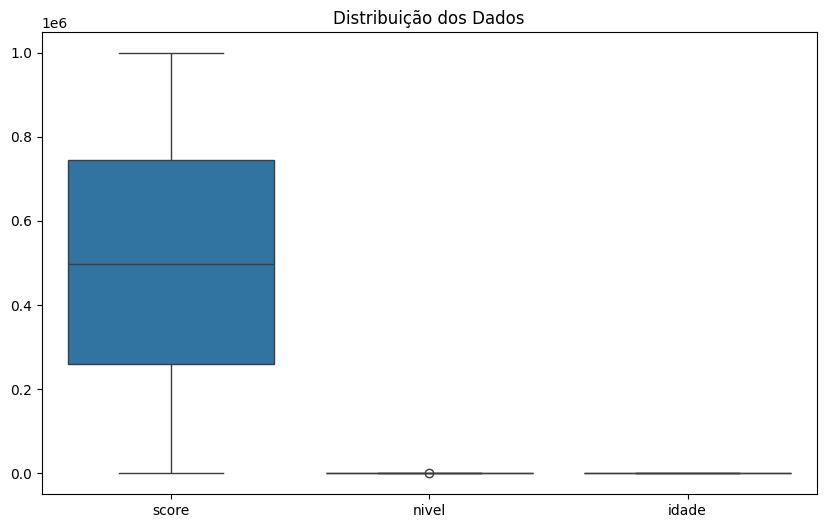

                id          score        nivel       idade
count   999.000000     999.000000   999.000000  999.000000
mean    500.983984  496548.613614   496.107107   56.787788
std     288.558097  283248.654609   286.466415   25.191153
min       1.000000    -464.000000  -103.000000   12.000000
25%     251.500000  259761.500000   250.000000   35.000000
50%     501.000000  497023.500000   493.500000   59.000000
75%     750.500000  744780.000000   742.000000   78.000000
max    1000.000000  998871.000000  1000.000000  133.000000


<ipython-input-1-0fd9e94262d7>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['score'].fillna(df['score'].median(), inplace=True)
<ipython-input-1-0fd9e94262d7>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [1]:
!pip install pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('jogadores.csv')

print(df.columns)

print(df.head())

print(df.isnull().sum())

print(df.describe())

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['score', 'nivel', 'idade']])
plt.title('Distribuição dos Dados')
plt.show()

df['score'].fillna(df['score'].median(), inplace=True)
df['nivel'].fillna(df['nivel'].median(), inplace=True)
df['idade'].fillna(df['idade'].median(), inplace=True)

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'score')
df = remove_outliers(df, 'nivel')
df = remove_outliers(df, 'idade')

print(df.describe())

df.to_csv('jogadores_tratados.csv', index=False)